In [1]:
# initial imports
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
%matplotlib inline
import matplotlib.pyplot as plt  # Matlab-style plotting
import seaborn as sns
color = sns.color_palette()
sns.set_style('darkgrid')
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)

from scipy import stats
from scipy.stats import norm, skew #for some statistics

In [2]:
# Import data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
print ("Size of train data : {}" .format(train.shape))
print ("Size of test data : {}" .format(test.shape))

Size of train data : (1460, 81)
Size of test data : (1459, 80)


## EDA

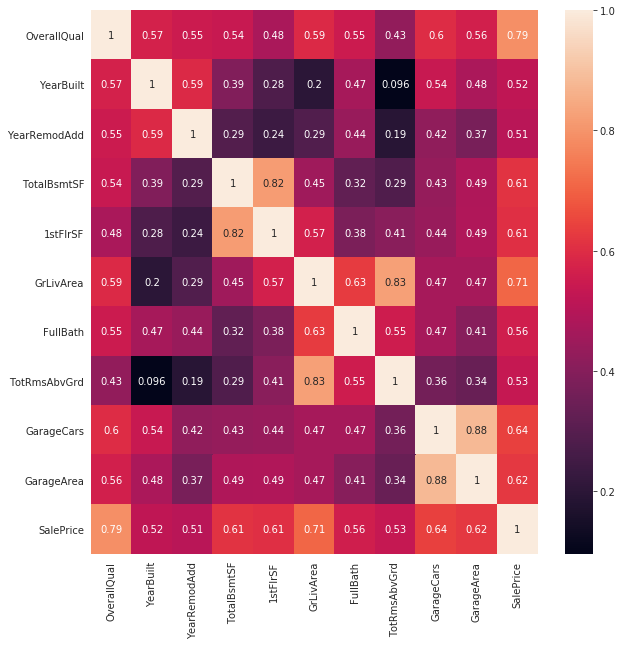

In [4]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(10,10))
g = sns.heatmap(train[top_corr_features].corr(),annot=True)

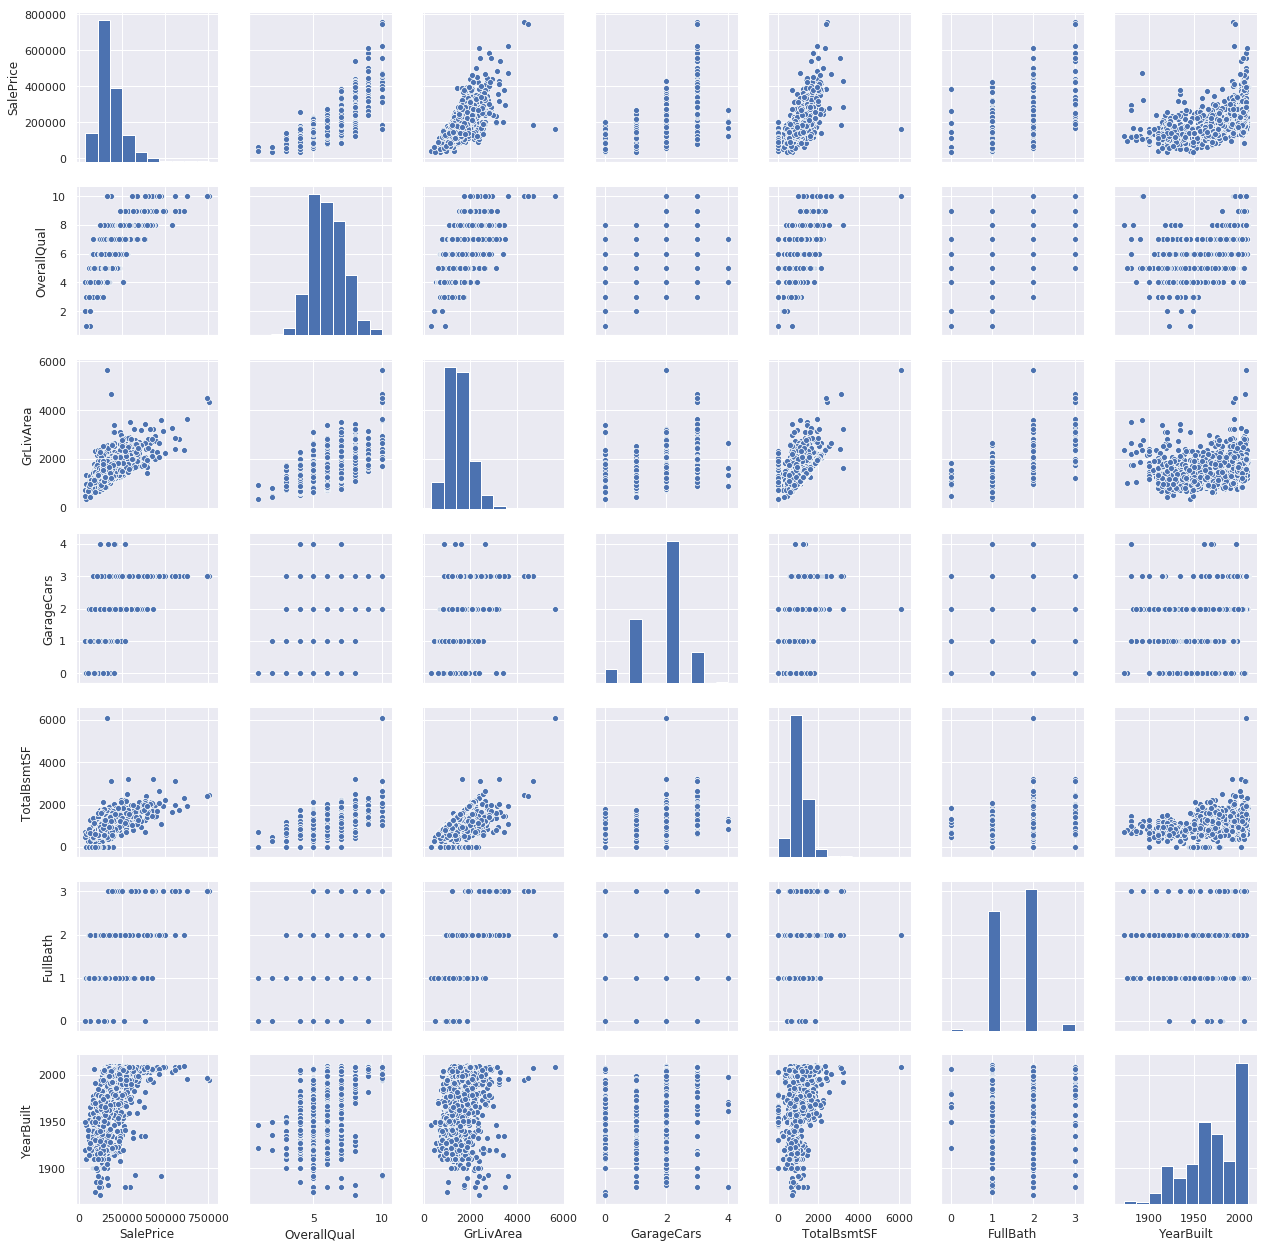

In [5]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

### Removing outliers in terms of GrLivArea and TotalBsmtSF

In [6]:
train = train.drop(train[(train['GrLivArea']>4000) & (train['SalePrice']<300000)].index)
train = train.drop(train[(train['TotalBsmtSF']>4000)].index)

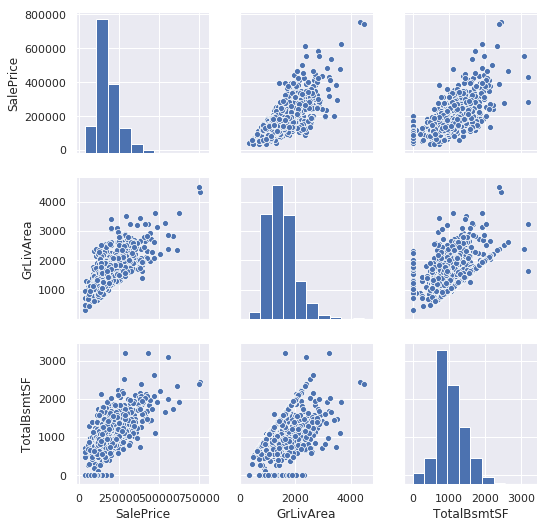

In [7]:
sns.set()
cols = ['SalePrice', 'GrLivArea', 'TotalBsmtSF']
sns.pairplot(train[cols], size = 2.5)
plt.show();

## Data Manipulation

In [8]:
ntrain = train.shape[0]
ntest = test.shape[0]
y_train = train.SalePrice.values
data = pd.concat((train, test)).reset_index(drop=True)
data.drop(['SalePrice'], axis=1, inplace=True)
print("Concatenated data size is : {}".format(data.shape))

Concatenated data size is : (2917, 80)


### Missing Values

In [9]:
data.columns[data.isnull().any()]

Index(['Alley', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtFinType1', 'BsmtFinType2', 'BsmtFullBath', 'BsmtHalfBath',
       'BsmtQual', 'BsmtUnfSF', 'Electrical', 'Exterior1st', 'Exterior2nd',
       'Fence', 'FireplaceQu', 'Functional', 'GarageArea', 'GarageCars',
       'GarageCond', 'GarageFinish', 'GarageQual', 'GarageType', 'GarageYrBlt',
       'KitchenQual', 'LotFrontage', 'MSZoning', 'MasVnrArea', 'MasVnrType',
       'MiscFeature', 'PoolQC', 'SaleType', 'TotalBsmtSF', 'Utilities'],
      dtype='object')

In [10]:
# Replacing missing value with None for appropiate columns acc to data description
data["PoolQC"] = data["PoolQC"].fillna("None")
data["MiscFeature"] = data["MiscFeature"].fillna("None")
data["Alley"] = data["Alley"].fillna("None")
data["Fence"] = data["Fence"].fillna("None")
data["FireplaceQu"] = data["FireplaceQu"].fillna("None")
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data['MSSubClass'] = data['MSSubClass'].fillna("None")
for col in ['GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']:
    data[col] = data[col].fillna('None')
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')
    
# Replacing missing value with 0 for appropiate columns acc to data description
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)
data["LotFrontage"] = data["LotFrontage"].fillna(0)

# Replacing missing value with most common value for appropiate columns acc to data description
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])
for col in ['Electrical','KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']:
    data[col] = data[col].fillna(data[col].mode()[0])
data["Functional"] = data["Functional"].fillna("Typ")

# Dropping column
data = data.drop(['Utilities'], axis=1)

In [11]:
data.columns[data.isnull().any()]

Index([], dtype='object')

In [12]:
# Converting numeric catagorical data to str
data['MSSubClass'] = data['MSSubClass'].apply(str)
data['OverallCond'] = data['OverallCond'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [13]:
# Label encoding
from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')

for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

print('Shape all_data: {}'.format(data.shape))

Shape all_data: (2917, 79)


In [14]:
# Creating new feature total SF
data['TotalSF'] = data['TotalBsmtSF'] + data['1stFlrSF'] + data['2ndFlrSF']

### Log transforming data


 mu = 180932.92 and sigma = 79467.79



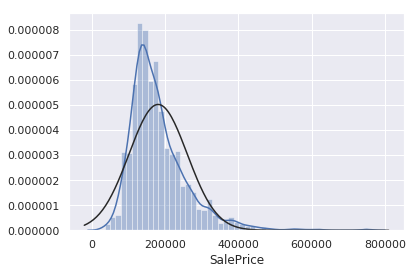

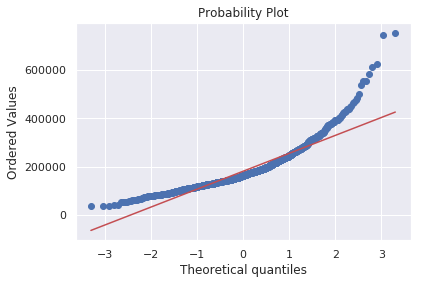

In [15]:
def is_skewed(col):
    sns.distplot(train[col] , fit=norm);
    fig = plt.figure()
    res = stats.probplot(train[col], plot=plt)
    # Get the fitted parameters used by the function
    (mu, sigma) = norm.fit(train[col])
    print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
    
is_skewed('SalePrice')

In [16]:
# Checking other skewed features
numeric_feats = data.dtypes[data.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(15)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
LandSlope,4.973254
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101


In [17]:
#log transform the target:
train["SalePrice"] = np.log1p(train["SalePrice"])

# #log transform skewed numeric features:
# numeric_feats = data.dtypes[data.dtypes != "object"].index

# skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna())) #compute skewness
# skewed_feats = skewed_feats[skewed_feats > 0.75]
# skewed_feats = skewed_feats.index

# data[skewed_feats] = np.log1p(data[skewed_feats])

In [18]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #all_data[feat] += 1
    data[feat] = boxcox1p(data[feat], lam)

There are 60 skewed numerical features to Box Cox transform


In [19]:
data = pd.get_dummies(data)
data.shape

(2917, 221)

## Creating models

In [53]:
#creating matrices for sklearn:
X_train = data[:ntrain]
X_test = data[ntrain:]
y_train = train.SalePrice.values
X_train.shape

(1458, 221)

### Cross validation

In [21]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [22]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC, LinearRegression
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb

In [23]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)
score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Kernel Ridge score: 0.1166 (0.0064)



In [24]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))
score = rmsle_cv(lasso)
print("Lasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Lasso score: 0.1115 (0.0074)



In [25]:
lr = LinearRegression()
score = rmsle_cv(lr)
print("LR score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

LR score: 539154730.2899 (541967211.3758)



In [26]:
xgbm = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1)
score = rmsle_cv(xgbm)
print("XGB score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

XGB score: 0.1196 (0.0053)



In [27]:
rfm = RandomForestRegressor(random_state = 42)
score = rmsle_cv(rfm)
print("RF score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

RF score: 0.1463 (0.0016)



In [28]:
LassoMd = lasso.fit(X_train.values,y_train)
KRRMd = KRR.fit(X_train.values,y_train)
XgbMd = xgbm.fit(X_train.values,y_train)
RfMd = rfm.fit(X_train.values,y_train)
preds = np.expm1(LassoMd.predict(X_test.values)) + np.expm1(KRRMd.predict(X_test.values))  + np.expm1(RfMd.predict(X_test.values))
preds = preds/3

In [29]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":preds})
solution.to_csv("ensemble_sol.csv", index = False)

In [30]:
def get_accuracy(y, y_pred):
    cnt = (y == y_pred).sum()
    return round(cnt/len(y), 2)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from knn import KnnRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

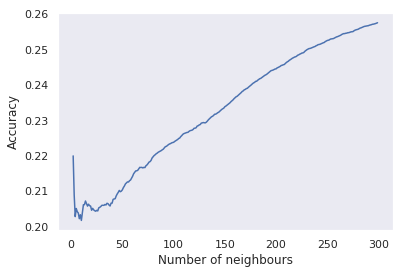

In [78]:
knn_iris_acc = []

X_train, X_test, y_train, y_test = train_test_split(data[:ntrain], train.SalePrice.values, test_size=0.2)

X_cols = ["LotArea", "YearBuilt", "OverallQual"]
X_train = X_train[X_cols]
X_test = X_test[X_cols]
scale = MinMaxScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)
for k in range(2, 300):
    clf = KnnRegression(k)
    clf.fit(X_train, y_train)
    iris_pred = []
    for x in X_test:
        pred = clf.predict(x)
        iris_pred.append(pred)
    iris_target_pred = np.array(iris_pred)
    knn_iris_acc.append(sqrt(mean_squared_error(y_test, iris_target_pred)))

plt.plot(range(2, 300), knn_iris_acc)
plt.xlabel('Number of neighbours')
plt.ylabel('Accuracy')
plt.grid()
plt.show()

In [37]:
X_train, X_test, y_train, y_test = train_test_split(data[:ntrain], train.SalePrice.values, test_size=0.2)
print (X_train.shape, y_train.shape)
print (sqrt(mean_squared_error(y_test, iris_target_pred))X_test.shape, y_test.shape)

(1166, 221) (1166,)
(292, 221) (292,)


In [49]:
clf = KnnRegression(7)
clf.fit(X_train, y_train)
X_test = data[ntrain:]
X_test = scale.fit_transform(X_test)
prd = []
for x in X_test:
    pred = clf.predict(x)
    prd.append(pred)
preds = np.array(prd)

In [50]:
solution = pd.DataFrame({"id":test.Id, "SalePrice":np.expm1(preds)})
solution.to_csv("knn.csv", index = False)

In [51]:
from sklearn.neighbors import KNeighborsRegressor

In [83]:
m = KNeighborsRegressor(20)
#creating matrices for sklearn:
X_train = data[:ntrain]
X_test = data[ntrain:]
y_train = train.SalePrice.values
X_train.shape
X_cols = ["LotArea", "YearBuilt", "OverallQual"]
X_train = X_train[X_cols]
X_test = X_test[X_cols]
score = rmsle_cv(m)
print("KNN score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

KNN score: 0.2252 (0.0132)



In [60]:
data

,1stFlrSF,2ndFlrSF,3SsnPorch,Alley,BedroomAbvGr,BsmtCond,BsmtExposure,BsmtFinSF1,BsmtFinSF2,BsmtFinType1,...,SaleCondition_Partial,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD
0,11.692623,11.686189,0.000000,0.730463,1.540963,1.820334,1.540963,11.170327,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1
1,12.792276,0.000000,0.000000,0.730463,1.540963,1.820334,0.730463,12.062832,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
2,11.892039,11.724598,0.000000,0.730463,1.540963,1.820334,1.194318,10.200343,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1
3,12.013683,11.354094,0.000000,0.730463,1.540963,0.730463,1.540963,8.274266,0.000000,0.000000,...,0,0,0,0,0,0,0,0,0,1
4,12.510588,12.271365,0.000000,0.730463,1.820334,1.820334,0.000000,10.971129,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1
5,11.493820,10.589574,9.178051,0.730463,0.730463,1.820334,1.540963,11.267217,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1
6,13.670207,0.000000,0.000000,0.730463,1.540963,1.820334,0.000000,13.031093,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1
7,12.413831,12.077149,0.000000,0.730463,1.540963,1.820334,1.194318,11.702249,4.597157,0.000000,...,0,0,0,0,0,0,0,0,0,1
8,12.186751,11.339779,0.000000,0.730463,1.194318,1.820334,1.540963,0.000000,0.000000,2.259674,...,0,0,0,0,0,0,0,0,0,1
9,12.335431,0.000000,0.000000,0.730463,1.194318,1.820334,1.540963,11.676516,0.000000,1.194318,...,0,0,0,0,0,0,0,0,0,1
